<a href="https://colab.research.google.com/github/achuvt/deep_learning/blob/main/Assessment2/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assessment - 2

Take a random image and apply convolution method using this following filters:

1. Apply filter size of 3 X 3 and 5 X 5.

2. Apply filter size of 3 X 3 and 5 X 5, taking stride = 2 

3. Apply filter size of 3 X 3 and 5 X 5, taking stride = 1 and zero padding

4. Evaluate the filtered images using 'entropy' as a metric

Link to github:

https://github.com/achuvt/deep_learning/blob/main/Assessment_2.ipynb

In [1]:
# Import libraries
import numpy as np
import skimage.measure
import matplotlib.pyplot as plt

from cv2 import cv2

In [2]:
#mount the drive where the image is stored
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


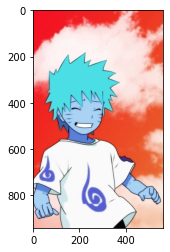

In [3]:
#read image from drive
img = cv2.imread("/content/drive/MyDrive/Deep Learning/naruto.jpg")
plt.imshow(img)

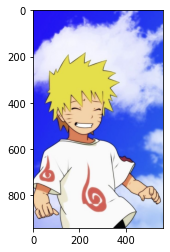

In [4]:
#convert to RGB scale to view original image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

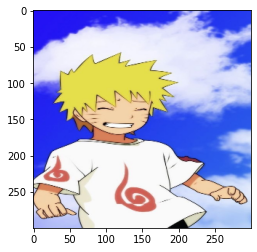

In [5]:
#resizing the image to nxn dimension
img = cv2.resize(img,(300,300))
plt.imshow(img)

In [6]:
#define the 3x3 filter (box blur filter)
filter3x3 = np.ones((3, 3), np.float32) / 9
print(filter3x3)

[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


In [7]:
#define the 5x5 filter (box blur filter)
filter5x5 = np.ones((5, 5), np.float32) / 25
print(filter5x5)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


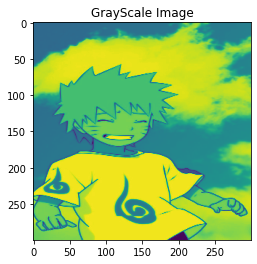

In [8]:
#convert the image to grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.title("GrayScale Image")
plt.imshow(img_gray)

In [9]:
print(img_gray)

[[ 87  87  87 ... 111 111 111]
 [ 87  87  87 ... 111 111 111]
 [ 87  87  87 ... 111 111 111]
 ...
 [195 195 196 ... 217 217 216]
 [194 194 195 ... 219 217 217]
 [194 194 194 ... 220 219 218]]


Entropy: 6.721867221409825


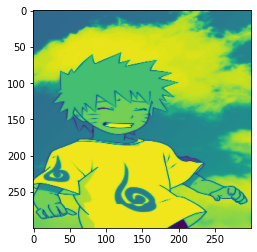

In [31]:
#Entropy of the input image
plt.imshow(img_gray)
entropy = skimage.measure.shannon_entropy(img_gray)
print("Entropy:", entropy)

## Define the functions to perform convolution operation on the image

1. convolution - Convolves the input image with the specified filter
- This function was obtained by combining 3 steps:

i. only filter

ii. filter with stride

iii. filter with stride and padding

2. applyFilter - Performs the dot product of the image slice and filter

In [ ]:
#DONOT RUN CELL
# This cell contains the step by step creation of function 'convolution'

# Only filter for Task 1

def convolution(img_x, filter, stride = 1): 

  print("Size of the input image: ", img_x.shape)
  print("Size of the filter     : ", filter.shape)

  img_output_size = int((img_x.shape[0] - filter.shape[0])/stride + 1) #feature size 
  img_output =  np.zeros((img_output_size, img_output_size)) # creates an output image with 0s
  a = 0 #track of rows for output image

  for i in range(img_output_size):
    b = 0 #track of columns of output image
    for j in range(img_output_size):
      img_slice = img_x[i:i+filter.shape[0],j:j+filter.shape[1]]#taking slice of image based on filter size
      img_output[a][b]= applyFilter(img_slice, filter)
      b = b + 1;
     a = a + 1;
  print("Size of output image   : ", img_output.shape)
  return img_output


# Filter and Stride for Task 2
# adds j = j + stride - 1 and i = i + stride - 1
def convolution(img_x, filter, stride = 1): 

  print("Size of the input image: ", img_x.shape)
  print("Size of the filter     : ", filter.shape)

  img_output_size = int((img_x.shape[0] + - filter.shape[0])/stride + 1) #feature size 
  img_output =  np.zeros((img_output_size, img_output_size)) # creates an output image with 0s
  a = 0 #track of rows for output image

  for i in range(img_output_size):
    b = 0 #track of columns of output image
    for j in range(img_output_size):
      img_slice = img_x[i:i+filter.shape[0],j:j+filter.shape[1]]#taking slice of image based on filter size
      img_output[a][b]= applyFilter(img_slice, filter)
      b = b + 1;
      j = j + stride - 1 #since default stride is 1, it is already taken care of by the loop increment
    a = a + 1;
    i = i + stride - 1
  print("Size of output image   : ", img_output.shape)
  return img_output


  # Filter with stride and zero padding for Task 3
  # adds zero padding of the image in the beginning and the new formula to calculate the output image size

  def convolution(img_x, filter, stride = 1, padding = 0): 

  print("Size of the input image: ", img_x.shape)
  print("Size of the filter     : ", filter.shape)

  if(padding != 0): #adds zeros to boundaries of the image if padding is not 0
    img_padded = np.zeros((img_x.shape[0] + (filter.shape[0]-1), 
                             img_x.shape[1] + (filter.shape[1]-1)))   
    img_padded[(filter.shape[0]//2):-(filter.shape[0]//2), 
                 (filter.shape[1]//2):-(filter.shape[1]//2)] = img_x
    img_x = img_padded
    print("Size of padded image   : ", img_x.shape)

  img_output_size = int((img_x.shape[0] + 2*padding - filter.shape[0])/stride + 1) #feature size 
  img_output =  np.zeros((img_output_size, img_output_size)) # creates an output image with 0s
  a = 0 #track of rows for output image

  for i in range(img_output_size):
    b = 0 #track of columns of output image
    for j in range(img_output_size):
      img_slice = img_x[i:i+filter.shape[0],j:j+filter.shape[1]]#taking slice of image based on filter size
      img_output[a][b]= applyFilter(img_slice, filter)
      b = b + 1;
      j = j + stride - 1 #since default stride is 1, it is already taken care of by the loop increment
    a = a + 1;
    i = i + stride - 1
  print("Size of output image   : ", img_output.shape)
  return img_output

In [23]:
#this cell contains the final combined functions used for the tasks.
def applyFilter(img, filter):
    sum = 0
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            sum = sum + (img[i,j] * filter[i,j]) #dot product
    return round(sum)

def convolution(img_x, filter, stride = 1, padding = 0): 

  print("Size of the input image: ", img_x.shape)
  print("Size of the filter     : ", filter.shape)

  if(padding != 0): #adds zeros to boundaries of the image if padding is not 0
    img_padded = np.zeros((img_x.shape[0] + (filter.shape[0]-1), 
                             img_x.shape[1] + (filter.shape[1]-1)))   
    img_padded[(filter.shape[0]//2):-(filter.shape[0]//2), 
                 (filter.shape[1]//2):-(filter.shape[1]//2)] = img_x
    img_x = img_padded
    print("Size of padded image   : ", img_x.shape)

  img_output_size = int((img_x.shape[0] + 2*padding - filter.shape[0])/stride + 1) #feature size 
  img_output =  np.zeros((img_output_size, img_output_size)) # creates an output image with 0s
  a = 0 #track of rows for output image

  for i in range(img_output_size):
    b = 0 #track of columns of output image
    for j in range(img_output_size):
      img_slice = img_x[i:i+filter.shape[0],j:j+filter.shape[1]]#taking slice of image based on filter size
      img_output[a][b]= applyFilter(img_slice, filter)
      b = b + 1;
      j = j + stride - 1 #since default stride is 1, it is already taken care of by the loop increment
    a = a + 1;
    i = i + stride - 1
  print("Size of output image   : ", img_output.shape)
  return img_output


##Task 1: Apply filter size of 3 X 3 and 5 X 5

Size of the input image:  (300, 300)
Size of the filter     :  (3, 3)
Size of output image   :  (298, 298)
Entropy: 6.67210809607152


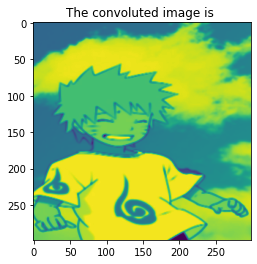

In [24]:
# Apply 3x3 filter to image
img_output = convolution(img_gray,filter3x3)
plt.title("The convoluted image is ")
plt.imshow(img_output)
entropy = skimage.measure.shannon_entropy(img_output)
print("Entropy:", entropy)


Size of the input image:  (300, 300)
Size of the filter     :  (5, 5)
Size of output image   :  (296, 296)
Entropy: 6.715743272530766


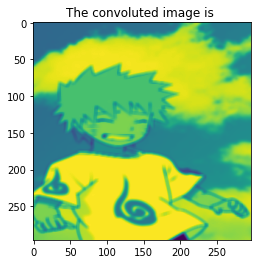

In [25]:
# Apply 5x5 filter to image
img_output = convolution(img_gray,filter5x5)
plt.title("The convoluted image is ")
plt.imshow(img_output)
entropy = skimage.measure.shannon_entropy(img_output)
print("Entropy:", entropy)

## Task 2: Applying Box filter of 3 X 3 and 5 X 5 with stride = 2

Size of the input image:  (300, 300)
Size of the filter     :  (3, 3)
Size of output image   :  (149, 149)
Entropy: 5.790267396295491


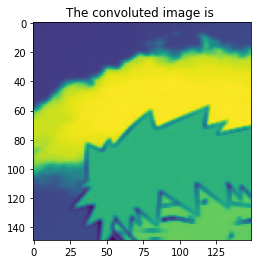

In [26]:
# Apply 3x3 filter to image
img_output = convolution(img_gray,filter3x3, 2, 0)
plt.title("The convoluted image is ")
plt.imshow(img_output)
entropy = skimage.measure.shannon_entropy(img_output)
print("Entropy:", entropy)

Size of the input image:  (300, 300)
Size of the filter     :  (5, 5)
Size of output image   :  (148, 148)
Entropy: 5.8485798490019665


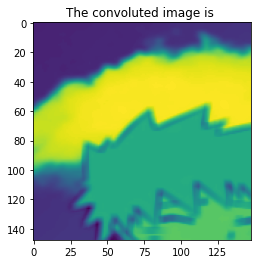

In [27]:
# Apply 3x3 filter to image
img_output = convolution(img_gray,filter5x5, 2)
plt.title("The convoluted image is ")
plt.imshow(img_output)
entropy = skimage.measure.shannon_entropy(img_output)
print("Entropy:", entropy)

##Task 3 - Apply zero padding before applying Box filter of 3 X 3 and 5 X 5

Size of the input image:  (300, 300)
Size of the filter     :  (3, 3)
Size of padded image   :  (302, 302)
Size of output image   :  (302, 302)
Entropy: 6.7591621626958265


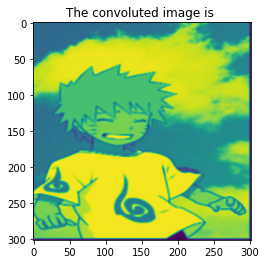

In [28]:
# Apply 3x3 filter to image
img_output = convolution(img_gray,filter3x3, 1, 1)
plt.title("The convoluted image is ")
plt.imshow(img_output)
entropy = skimage.measure.shannon_entropy(img_output)
print("Entropy:", entropy)

Size of the input image:  (300, 300)
Size of the filter     :  (5, 5)
Size of padded image   :  (304, 304)
Size of output image   :  (302, 302)
Entropy: 6.8498045804622105


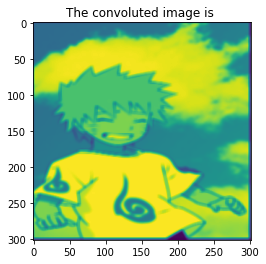

In [30]:
# Apply 5x5 filter to image
img_output = convolution(img_gray,filter5x5, 1, 1)
plt.title("The convoluted image is ")
plt.imshow(img_output)
entropy = skimage.measure.shannon_entropy(img_output)
print("Entropy:", entropy)

## Conclusion

The following tasks have been completed:

1. Applied filter size of 3 X 3 and 5 X 5.

2. Applied filter size of 3 X 3 and 5 X 5, taking stride = 2 

3. Applied filter size of 3 X 3 and 5 X 5, taking stride = 1 and zero padding

4. Evaluated the filtered images using 'entropy' as a metric. As entropy increases, we can see the information gain decreases.